In [1]:
import pandas as pd # Trabajos con datasets
import numpy as np # Funciones matemáticas
import matplotlib.pyplot as plt #Gráficos sencillos
import math

### Regresiones

Nuestro problema ahora es el siguiente:
$$f(x_1,x_2,x_3,...,x_n)\simeq y$$

Transformamos ese problema al siguiente:
$$\lVert f(x_1,x_2,x_3,...,x_n)-y\rVert\rightarrow \min$$

Vamos a realizar la prueba en el caso lineal a una sola variable
$$\lVert Ax-y\rVert\rightarrow \min$$

Si llamamos

$$g(x)=\lVert Ax-y \rVert^2$$


Entonces
$$g(x)=(Ax-y)^T(Ax-y)=(x^TA^T-y^T)(Ax-y)=x^TA^TAx-x^TA^Ty-y^TAx+y^Ty$$

Rem: $$(x^TA^T-y)^T=y^TAx$$

Lo que implica
$$g(x)=x^TA^TAx-2y^TAx+y^Ty$$

Derivando tenemos
$$g'(x)=2A^TAx-2A^Ty=0$$

Esto nos da una condición:
$$A^TAx=A^Ty$$

Como $A$ es una función lineal tenemos que el valor será mínimo y no máximo

Rem: A esta ecuación se denomina ecuación normal del sistema

Al realizar una regresión lineal tenemos
$$f(x)=ax+ \beta$$

Esencialmente, vamos a tener 
$$\begin{array}{rcl}\alpha x_1 +\beta &=&y_1\\ \alpha x_2 +\beta &=&y_2 \\ ...&=&...\\\alpha x_n +\beta &=&y_n\end{array}$$

Lo que nos da el sistema siguiente

$$\begin{bmatrix}x_1&1\\x_2&1\\\vdots&\vdots \\x_n&1\end{bmatrix}\begin{bmatrix}\alpha\\ \beta\end{bmatrix}=\begin{bmatrix}y_1\\y_2 \\\vdots \\y_n\end{bmatrix}$$

In [2]:
D=pd.read_csv('Advertising.csv')
D.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
D['unos']=1
D.head()

,TV,Radio,Newspaper,Sales,unos
0,230.1,37.8,69.2,22.1,1
1,44.5,39.3,45.1,10.4,1
2,17.2,45.9,69.3,9.3,1
3,151.5,41.3,58.5,18.5,1
4,180.8,10.8,58.4,12.9,1


In [4]:
A=D[['TV','unos']]
Acopy=A
A

,TV,unos
0,230.1,1
1,44.5,1
2,17.2,1
3,151.5,1
4,180.8,1
...,...,...
195,38.2,1
196,94.2,1
197,177.0,1
198,283.6,1


In [5]:
AA=np.transpose(A).dot(A)
AA

,TV,unos
TV,5791118.39,29408.5
unos,29408.50,200.0


In [6]:
y=D[['Sales']]
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [7]:
b=np.transpose(A).dot(y)
b

,Sales
TV,482108.34
unos,2804.50


In [8]:
sol=np.linalg.solve(AA,b)
solcopy=sol
sol,solcopy

(array([[0.04753664],
        [7.03259355]]),
 array([[0.04753664],
        [7.03259355]]))

In [9]:
sol[0][0],sol[1][0]

(0.04753664043301978, 7.032593549127689)

In [10]:
res=np.linalg.norm(np.array(A.dot(sol))-np.array(y))
res

45.853359562101346

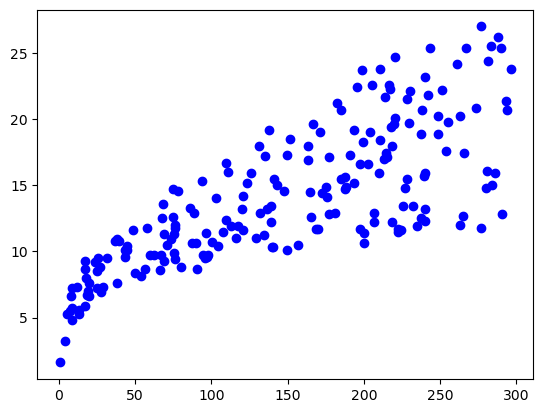

In [11]:
plt.plot(D[['TV']],y,'bo')
plt.show()

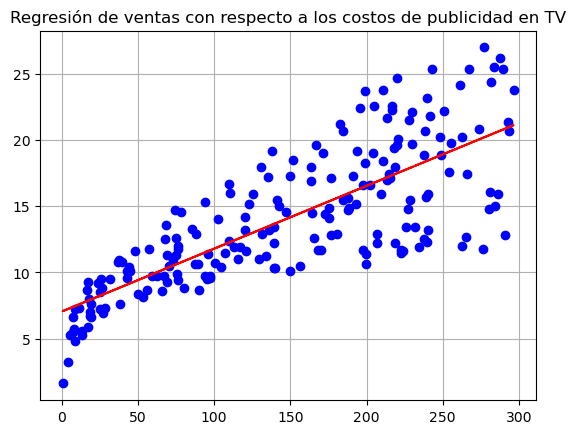

In [12]:
plt.plot(D[['TV']],y,'bo',D[['TV']],np.array(A.dot(sol)),'r')
plt.grid()
plt.title('Regresión de ventas con respecto a los costos de publicidad en TV')
plt.show()

$$\begin{array}{rcl}\alpha x_1^2 +\beta x_1+\gamma &=&y_1\\ \alpha x_2^2 +\beta x_2+\gamma &=&y_2 \\ ...&=&...\\\alpha x_n^2 +\beta x_n+\gamma&=&y_n\end{array}$$

Lo que nos da la matriz siguiente

$$\begin{bmatrix}x_1^2&x_1&x_1^0\\x_2^2&x_2&x_2^0\\\vdots&\vdots &\vdots\\x_n^2&x_n&x_n^0\end{bmatrix}=\begin{bmatrix}\alpha\\\beta \\\gamma\end{bmatrix}= \begin{bmatrix}y_1\\y_2\\\vdots \\y_n\end{bmatrix}$$

In [13]:
A=pd.concat([D.TV**2,D[['TV','unos']]],axis=1)
A

,TV,TV,unos
0,52946.01,230.1,1
1,1980.25,44.5,1
2,295.84,17.2,1
3,22952.25,151.5,1
4,32688.64,180.8,1
...,...,...,...
195,1459.24,38.2,1
196,8873.64,94.2,1
197,31329.00,177.0,1
198,80428.96,283.6,1


In [14]:
AA=np.transpose(A).dot(A)
AA

,TV,TV,unos
TV,2.977499e+11,1.274201e+09,5791118.39
TV,1.274201e+09,5.791118e+06,29408.50
unos,5.791118e+06,2.940850e+04,200.00


In [15]:
b=np.transpose(A).dot(y)
b

,Sales
TV,1.007312e+08
TV,4.821083e+05
unos,2.804500e+03


In [16]:
sol=np.linalg.solve(AA,b)
sol

array([[-6.84693373e-05],
       [ 6.72659270e-02],
       [ 6.11412013e+00]])

In [17]:
res=np.linalg.norm(np.array(A.dot(sol))-np.array(y))
res

45.428323830518906

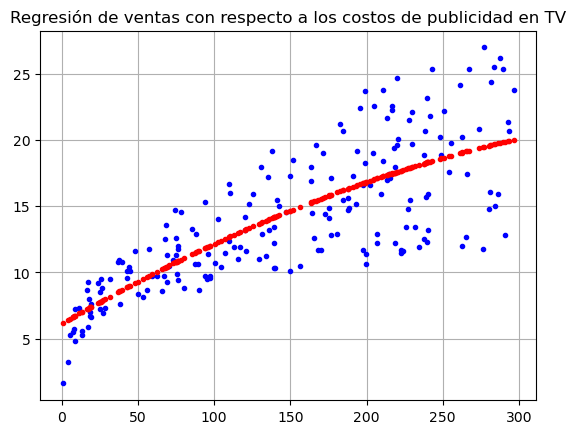

In [18]:
plt.plot(D[['TV']],y,'b.',D[['TV']],np.array(A.dot(sol)),'r.')
plt.grid()
plt.title('Regresión de ventas con respecto a los costos de publicidad en TV')
plt.show()

In [19]:
B=pd.concat([A,y],axis=1)
B

,TV,TV,unos,Sales
0,52946.01,230.1,1,22.1
1,1980.25,44.5,1,10.4
2,295.84,17.2,1,9.3
3,22952.25,151.5,1,18.5
4,32688.64,180.8,1,12.9
...,...,...,...,...
195,1459.24,38.2,1,7.6
196,8873.64,94.2,1,9.7
197,31329.00,177.0,1,12.8
198,80428.96,283.6,1,25.5


In [20]:
B.columns=['TV2','TV',"1's",'Ventas']
B

,TV2,TV,1's,Ventas
0,52946.01,230.1,1,22.1
1,1980.25,44.5,1,10.4
2,295.84,17.2,1,9.3
3,22952.25,151.5,1,18.5
4,32688.64,180.8,1,12.9
...,...,...,...,...
195,1459.24,38.2,1,7.6
196,8873.64,94.2,1,9.7
197,31329.00,177.0,1,12.8
198,80428.96,283.6,1,25.5


In [21]:
def RegresionPol(dataset,Vexplicativa,Vobjetivo,grado):
    D=dataset[[Vexplicativa,Vobjetivo]]
    D=D.sort_values(Vexplicativa)
    x=D[[Vexplicativa]]
    y=D[[Vobjetivo]]
    A=x**0
    for i in range(1,grado):
        A=pd.concat([x**i,A],axis=1)
    AA=np.transpose(A).dot(A)
    b=np.transpose(A).dot(y)
    sol=np.linalg.solve(AA,b)
    res=np.linalg.norm(np.array(A.dot(sol))-np.array(y))
    return x,y,A,sol,res

In [22]:
x,y,A,sol,res=RegresionPol(D,'TV','Sales',2)

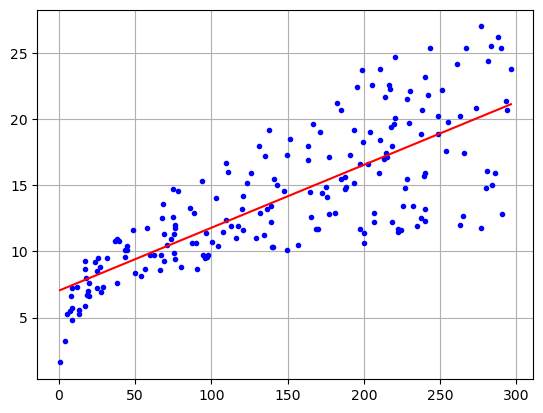

In [23]:
plt.plot(x,y,'b.',x,np.array(A.dot(sol)),'r')
plt.grid()
plt.show()

In [24]:
res

45.853359562101346

## --------- Regresión lineal ---------

In [25]:
X=D[['TV']]
Y=D[['Sales']]
X,Y

(        TV
 0    230.1
 1     44.5
 2     17.2
 3    151.5
 4    180.8
 ..     ...
 195   38.2
 196   94.2
 197  177.0
 198  283.6
 199  232.1
 
 [200 rows x 1 columns],
      Sales
 0     22.1
 1     10.4
 2      9.3
 3     18.5
 4     12.9
 ..     ...
 195    7.6
 196    9.7
 197   12.8
 198   25.5
 199   13.4
 
 [200 rows x 1 columns])

Las dos variables tienen el mismo tamaño, son compatibles
- X: Costos en ads de Televisión
- Y: Ventas totales

### 1. Calcular las medias de las variables

$$\overline{x}=\frac{\sum x_i}{N}$$
$$\overline{y}=\frac{\sum y_i}{N}$$

In [26]:
mediaX=X.mean()[0]
mediaX

147.0425

In [27]:
mediaY=Y.mean()[0]
mediaY

14.022500000000003

### 2. Calcular las varianzas, desviaciones estandar y covarianza de las variables

#### Varianza
$${\sigma_x}^2=\frac{\sum {x_i}^2}{N}$$
$${\sigma_y}^2=\frac{\sum {y_i}^2}{N}$$

#### Desviaciones estándar
$${\sigma_x}$$
$${\sigma_y}$$

#### Covarianza

$${\sigma_{xy}}=\frac{\sum x_iy_i}{N}-\overline{x} \overline{y}$$

In [28]:
xcuad=X['TV'].map(lambda number:number**2)
ycuad=Y['Sales'].map(lambda number:number**2)
xcuad,ycuad

(0      52946.01
 1       1980.25
 2        295.84
 3      22952.25
 4      32688.64
          ...   
 195     1459.24
 196     8873.64
 197    31329.00
 198    80428.96
 199    53870.41
 Name: TV, Length: 200, dtype: float64,
 0      488.41
 1      108.16
 2       86.49
 3      342.25
 4      166.41
         ...  
 195     57.76
 196     94.09
 197    163.84
 198    650.25
 199    179.56
 Name: Sales, Length: 200, dtype: float64)

In [29]:
varX=(xcuad.sum()/len(xcuad))-(mediaX**2)
varY=(ycuad.sum()/len(ycuad))-(mediaY**2)
desX=math.sqrt(varX)
desY=math.sqrt(varY)
desX,desY,varX,varY

(85.63933175679269, 5.204396578855221, 7334.095143750001, 27.08574374999992)

In [30]:
multi=X['TV']*Y['Sales']
multi

0      5085.21
1       462.80
2       159.96
3      2802.75
4      2332.32
        ...   
195     290.32
196     913.74
197    2265.60
198    7231.80
199    3110.14
Length: 200, dtype: float64

In [31]:
covar=(multi.sum()/len(multi))-(mediaX*mediaY)
covar

348.6382437499997

### 3. Calcular los coeficientes de correlación y determinación $R^2$

#### Correlación múltiple
$$r=\frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$$

#### Determinación $R^2$
$$r^2$$


In [32]:
correlacion=covar/(desX*desY)
correlacion

0.7822244248616068

In [33]:
determinacion=correlacion**2
determinacion

0.6118750508500715

### 4. Generar la recta de regresión
$$y=a+bx$$
$$b=\frac{\sigma_{xy}}{\sigma_{x^2}}$$
$$a=\overline{y}-b\overline{x}$$

In [34]:
b=covar/varX
a=mediaY-(b*mediaX)
b,a

(0.047536640433019695, 7.0325935491277045)

In [35]:
solcopy[0][0],solcopy[1][0]

(0.04753664043301978, 7.032593549127689)

In [36]:
###Aclone=D[['TV','unos']]
res=np.linalg.norm(np.array(A.dot([[b],[a]]))-np.array(y))
res

45.85335956210135

In [37]:
res=np.linalg.norm(np.array(A.dot(sol))-np.array(y))
res

45.853359562101346

In [38]:
np.array(Acopy.dot(sol))

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431],
       [10.17476548],
       [17.23871025],
       [ 8.16396559],
       [11.66741599],
       [16.73482186],
       [16.32125309],
       [10.25557777],
       [20.40940417],
       [10.32212907],
       [14.03474068],
       [17.41459582],
       [18.31779199],
       [ 7.6600772 ],
       [17.88520856],
       [ 9.99412625],
       [19.52997632],
       [13.82557947],
       [18.44614092],
       [18.85970969],
       [10.38868036],
       [20.95607553],
       [12.39948025],
       [11.653155  ],
       [19.65832525],
       [11.58185004],
       [20.85149492],
       [19.72012288],
       [10.58358059],
       [ 9.08142275],
       [17.87094757],
       [16.65876324],
       [15.44657891],
       [20.98935118],
       [16.86792445],
       [ 8.22576322],
       [15

In [39]:
np.array(Acopy.dot(solcopy))

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431],
       [10.17476548],
       [17.23871025],
       [ 8.16396559],
       [11.66741599],
       [16.73482186],
       [16.32125309],
       [10.25557777],
       [20.40940417],
       [10.32212907],
       [14.03474068],
       [17.41459582],
       [18.31779199],
       [ 7.6600772 ],
       [17.88520856],
       [ 9.99412625],
       [19.52997632],
       [13.82557947],
       [18.44614092],
       [18.85970969],
       [10.38868036],
       [20.95607553],
       [12.39948025],
       [11.653155  ],
       [19.65832525],
       [11.58185004],
       [20.85149492],
       [19.72012288],
       [10.58358059],
       [ 9.08142275],
       [17.87094757],
       [16.65876324],
       [15.44657891],
       [20.98935118],
       [16.86792445],
       [ 8.22576322],
       [15

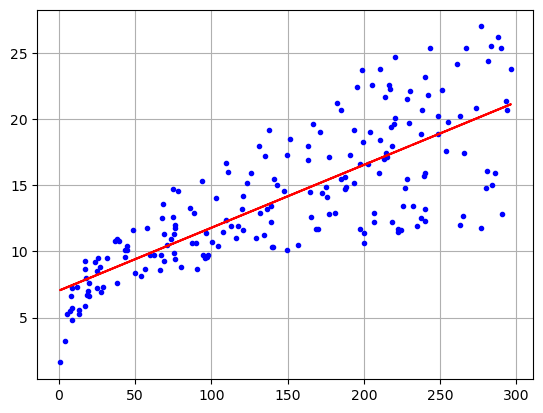

In [40]:
plt.plot(X['TV'],Y['Sales'],'b.',X['TV'],np.array(Acopy.dot(np.array([[b],[a]]))),'r')
plt.grid()
plt.show()

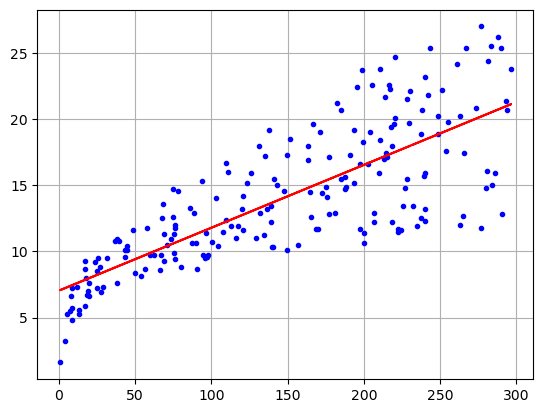

In [41]:
plt.plot(X['TV'],Y['Sales'],'b.',X['TV'],np.array(Acopy.dot(solcopy)),'r')
plt.grid()
plt.show()

In [42]:
def getRegresion(dataset,Vexplicativa,Vobjetivo,grado):
    X=dataset[[Vexplicativa]]
    Y=dataset[[Vobjetivo]]
    A=x**0
    for i in range(1,grado):
        A=pd.concat([X**i,A],axis=1)
    mediaX=X.mean()[0]
    mediaY=Y.mean()[0]
    xcuad=X[Vexplicativa].map(lambda number:number**2)
    ycuad=Y[Vobjetivo].map(lambda number:number**2)
    varX=(xcuad.sum()/len(xcuad))-(mediaX**2)
    varY=(ycuad.sum()/len(ycuad))-(mediaY**2)
    desX=math.sqrt(varX)
    desY=math.sqrt(varY)
    multi=X[Vexplicativa]*Y[Vobjetivo]
    covar=(multi.sum()/len(multi))-(mediaX*mediaY)
    correlacion=covar/(desX*desY)
    determinacion=correlacion**2
    b=covar/varX
    a=mediaY-(b*mediaX)
    arraySol=np.array([[b],[a]])
    return X,Y,A,correlacion,determinacion,arraySol

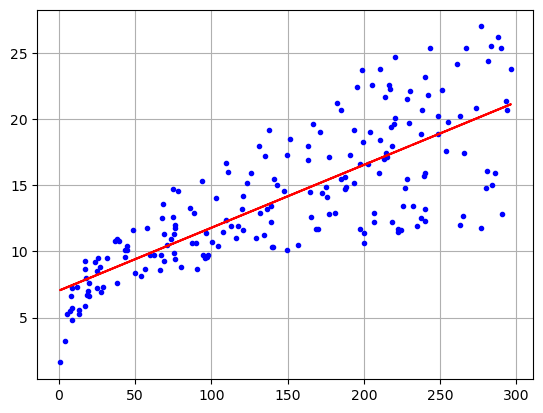

In [43]:
x,y,A,cor,det,soles=getRegresion(D,'TV','Sales',4)
plt.plot(x,y,'b.',x,np.array(A.dot(soles)),'r')
plt.grid()
plt.show()

In [44]:
print('Coeficiente de correlación múltiple:',cor)
print('Coeficiente de determinación R2:',det)

Coeficiente de correlación múltiple: 0.7822244248616068
Coeficiente de determinación R2: 0.6118750508500715


In [45]:
soles

array([[0.04753664],
       [7.03259355]])

## -------------------------------------------

#### Coeficiente de correlación (que tan bien se liga una variable con otra)

$$\rho=\frac{cov(X,Y)}{\sqrt{var(X)var(Y)}}$$

In [46]:
B.head()

,TV2,TV,1's,Ventas
0,52946.01,230.1,1,22.1
1,1980.25,44.5,1,10.4
2,295.84,17.2,1,9.3
3,22952.25,151.5,1,18.5
4,32688.64,180.8,1,12.9


In [47]:
D2=B[['TV','Ventas']]
D2.head()

,TV,Ventas
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [48]:
D2.corr()

,TV,Ventas
TV,1.000000,0.782224
Ventas,0.782224,1.000000


In [49]:
D3=pd.DataFrame(D2.corr())
D3.iloc[0,1]

0.7822244248616067

In [50]:
D2.cov()

,TV,Ventas
TV,7370.949893,350.390195
Ventas,350.390195,27.221853


In [51]:
D2.cov().iloc[0,1]/np.sqrt(D2.TV.var()*D2.Ventas.var())

0.7822244248616061

In [52]:
D2.Ventas.var()

27.221853015075364

In [53]:
D2.TV.var()

7370.949893216087

Se puede calcular el coeficiente de determinación $R^2$

$$R^2=\frac{cov^2(X,Y)}{var(X)var(Y)}$$

In [54]:
R2=D2.corr().iloc[0,1]**2
R2

0.6118750508500714

In [55]:
import sklearn as sky

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
help(LinearRegression())

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |   

In [58]:
red=LinearRegression().fit(D[['TV']],D[['Sales']])

In [59]:
red.score(D[['TV']],D[['Sales']])

0.611875050850071

In [60]:
red.coef_

array([[0.04753664]])

In [61]:
red.intercept_

array([7.03259355])

In [62]:
red.predict([[100],[200],[300]])

D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[11.78625759],
       [16.53992164],
       [21.29358568]])

In [63]:
X=D[['Radio','TV']]
Y=D[['Sales']]

In [64]:
reg2=LinearRegression().fit(X,Y)
reg2.score(X,Y),reg2.coef_,reg2.intercept_

(0.8971942610828956, array([[0.18799423, 0.04575482]]), array([2.92109991]))

In [65]:
reg2.predict([[150,200],[300,50],[50,200]])

D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[40.27119693],
       [61.60710865],
       [21.47177426]])

In [66]:
np.sqrt(reg2.score(X,Y))

0.9472033895013761

In [67]:
X=D[['TV','Radio','Newspaper']]
Y=D[['Sales']]

In [68]:
reg3=LinearRegression().fit(X,Y)
reg3.score(X,Y),reg3.coef_,reg3.intercept_

(0.8972106381789522,
 array([[ 0.04576465,  0.18853002, -0.00103749]]),
 array([2.93888937]))

In [69]:
np.sqrt(reg3.score(X,Y))

0.9472120344352432

In [70]:
reg3.predict([[200,100,100],[100,200,200],[50,150,250]])

D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[30.84107085],
       [45.01385869],
       [33.24725092]])

In [71]:
def Multilineal(dataset,variables,objetivo):
    A=pd.concat([dataset[variables],dataset[variables].iloc[:,0]**0],axis=1)
    b=dataset[objetivo]
    AA=np.transpose(A).dot(A)
    bb=np.transpose(A).dot(b)
    sol=np.linalg.solve(AA,bb)
    return sol

In [72]:
Multilineal(D,['TV','Radio','Newspaper'],['Sales'])

array([[ 4.57646455e-02],
       [ 1.88530017e-01],
       [-1.03749304e-03],
       [ 2.93888937e+00]])

In [73]:
reg3.coef_,reg3.intercept_

(array([[ 0.04576465,  0.18853002, -0.00103749]]), array([2.93888937]))

In [74]:
DB2=pd.read_csv('winequality-red.csv',sep=';')
DB2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [75]:
DB2.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

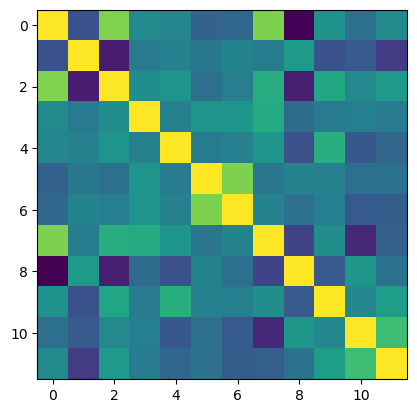

In [76]:
plt.imshow(DB2.corr())
plt.show()

In [77]:
DB2.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [78]:
X2=DB2[['volatile acidity']]
Y2=DB2[['quality']]
reg4=LinearRegression().fit(X2,Y2)
reg4.score(X2,Y2)

0.15253537972474862

In [79]:
X2=DB2[['alcohol']]
Y2=DB2[['quality']]
reg4=LinearRegression().fit(X2,Y2)
reg4.score(X2,Y2)

0.22673436811275482

In [80]:
X2=DB2[['sulphates']]
Y2=DB2[['quality']]
reg4=LinearRegression().fit(X2,Y2)
reg4.score(X2,Y2)

0.06320049136455663

In [81]:
X2=DB2[['alcohol','volatile acidity']]
Y2=DB2[['quality']]
reg4=LinearRegression().fit(X2,Y2)
reg4.score(X2,Y2)

0.31700243279698526

In [82]:
X2=DB2[['alcohol','volatile acidity','sulphates']]
Y2=DB2[['quality']]
reg4=LinearRegression().fit(X2,Y2)
reg4.score(X2,Y2)

0.3358973156526972

In [97]:
def deterColumnas(dataf,explicativas,objetivo):
    columns=[]
    for i in range(1,len(explicativas)+1,1):
        counter=i
        Xe=[]
        for j in range(counter):
            Xe.append(explicativas[j])
        reg=LinearRegression().fit(dataf[Xe],dataf[objetivo])
        print(reg.score(dataf[Xe],dataf[objetivo]))
    return columns

In [98]:
deterColumnas(DB2,['alcohol','volatile acidity','sulphates'],['quality'])

0.22673436811275482
0.31700243279698526
0.3358973156526972


[]

In [99]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [100]:
estimador=SVR(kernel='linear')


In [103]:
seleccionador=RFE(estimador,n_features_to_select=1,step=1)

In [111]:
DB2.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [110]:
Y=DB2['quality']
Y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [109]:
Ynp=np.array(Y)
Ynp

array([[5],
       [5],
       [5],
       ...,
       [6],
       [5],
       [6]], dtype=int64)

In [114]:
X=DB2[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [115]:
seleccionadorOF=seleccionador.fit(X,Y)

In [116]:
seleccionador.ranking_

array([ 7,  1,  6,  9,  2, 10, 11,  8,  5,  3,  4])

In [119]:
seleccionador.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False])

In [120]:
X2=DB2[['volatile acidity']]
Y2=DB2[['quality']]
reg4=LinearRegression().fit(X2,Y2)
reg4.score(X2,Y2)

0.15253537972474862

In [121]:
seleccionador=RFE(estimador,n_features_to_select=2,step=1)

In [122]:
seleccionadorOF=seleccionador.fit(X,Y)

In [123]:
seleccionadorOF.ranking_

array([ 6,  1,  5,  8,  1,  9, 10,  7,  4,  2,  3])

In [124]:
seleccionadorOF.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False])

In [125]:
X2=DB2[['volatile acidity','chlorides']]
Y2=DB2[['quality']]
reg4=LinearRegression().fit(X2,Y2)
reg4.score(X2,Y2)

0.163594845864788

In [126]:
RANK=pd.DataFrame(
{
    'Variables':X.columns,
    'Ranking':seleccionadorOF.ranking_,
    'Esta en el modelo':seleccionadorOF.support_
})

In [127]:
RANK

,Variables,Ranking,Esta en el modelo
0,fixed acidity,6,False
1,volatile acidity,1,True
2,citric acid,5,False
3,residual sugar,8,False
4,chlorides,1,True
5,free sulfur dioxide,9,False
6,total sulfur dioxide,10,False
7,density,7,False
8,pH,4,False
9,sulphates,2,False


In [133]:
seleccionador=RFE(estimador,n_features_to_select=3,step=1)

In [134]:
seleccionadorOF=seleccionador.fit(X,Y)

In [135]:
seleccionadorOF.ranking_

array([5, 1, 4, 7, 1, 8, 9, 6, 3, 1, 2])

In [136]:
seleccionadorOF.support_

array([False,  True, False, False,  True, False, False, False, False,
        True, False])

In [137]:
RANK=pd.DataFrame(
{
    'Variables':X.columns,
    'Ranking':seleccionadorOF.ranking_,
    'Esta en el modelo':seleccionadorOF.support_
})
RANK

,Variables,Ranking,Esta en el modelo
0,fixed acidity,5,False
1,volatile acidity,1,True
2,citric acid,4,False
3,residual sugar,7,False
4,chlorides,1,True
5,free sulfur dioxide,8,False
6,total sulfur dioxide,9,False
7,density,6,False
8,pH,3,False
9,sulphates,1,True


In [138]:
X2=DB2[['volatile acidity','chlorides','sulphates']]
Y2=DB2[['quality']]
reg4=LinearRegression().fit(X2,Y2)
reg4.score(X2,Y2)

0.20992780601332872

In [139]:
X2=DB2[['volatile acidity','chlorides','pH','sulphates','alcohol']]
Y2=DB2[['quality']]
reg10=LinearRegression().fit(X2,Y2)
reg10.score(X2,Y2)

0.3483140356739335

In [140]:
seleccionador=RFE(estimador,n_features_to_select=5,step=1)


In [141]:
seleccionadorOF=seleccionador.fit(X,Y)

In [142]:
seleccionadorOF.ranking_

array([3, 1, 2, 5, 1, 6, 7, 4, 1, 1, 1])

In [143]:
seleccionadorOF.support_

array([False,  True, False, False,  True, False, False, False,  True,
        True,  True])

In [144]:
RANK=pd.DataFrame(
{
    'Variables':X.columns,
    'Ranking':seleccionadorOF.ranking_,
    'Esta en el modelo':seleccionadorOF.support_
})
RANK

,Variables,Ranking,Esta en el modelo
0,fixed acidity,3,False
1,volatile acidity,1,True
2,citric acid,2,False
3,residual sugar,5,False
4,chlorides,1,True
5,free sulfur dioxide,6,False
6,total sulfur dioxide,7,False
7,density,4,False
8,pH,1,True
9,sulphates,1,True


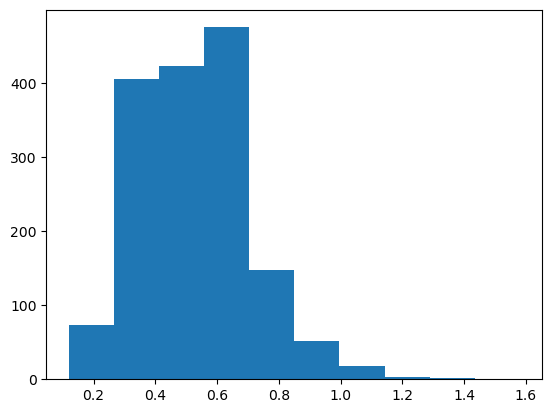

In [146]:
plt.hist(DB2['volatile acidity'])
plt.show()

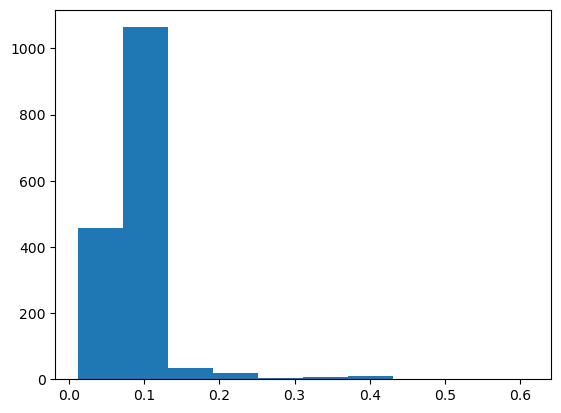

In [148]:
plt.hist(DB2['chlorides'])
plt.show()

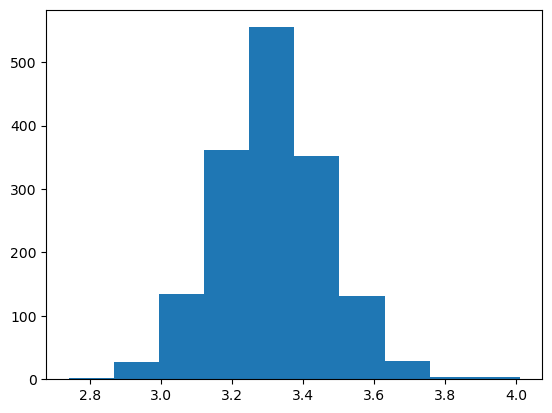

In [149]:
plt.hist(DB2['pH'])
plt.show()

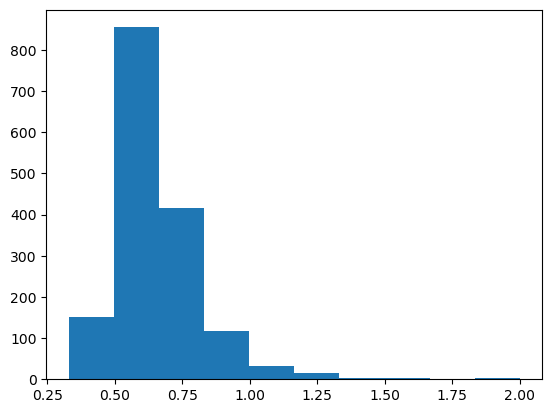

In [150]:
plt.hist(DB2['sulphates'])
plt.show()

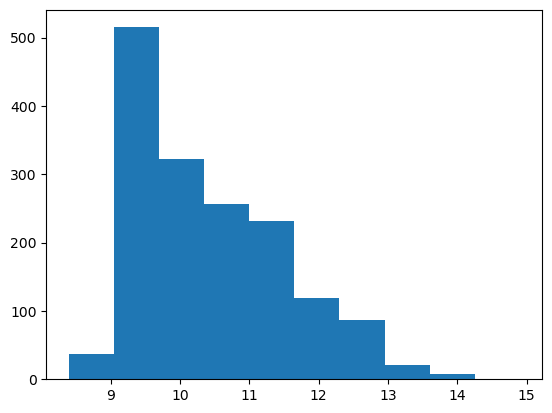

In [151]:
plt.hist(DB2['alcohol'])
plt.show()

In [170]:
D3=DB2[DB2['volatile acidity']<1.1]
len(D3),len(DB2)

(1591, 1599)

In [171]:
D31=D3[D3['chlorides']<0.25]
len(D31),len(DB2)

(1565, 1599)

In [172]:
D32=D3[D3['sulphates']<1.3]
len(D32),len(DB2)

(1577, 1599)

In [188]:
X2=D32[['volatile acidity','chlorides','pH','sulphates','alcohol']]
Y2=D32['quality']
reg10=LinearRegression().fit(X2,Y2)
reg10.score(X2,Y2)

0.3514803581841004

In [189]:
seleccionador=RFE(estimador,n_features_to_select=1,step=1)
X=D32[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [190]:
seleccionador=seleccionador.fit(X,Y2)
seleccionador.ranking_

array([ 7,  3,  6,  9,  1, 10, 11,  8,  5,  2,  4])

In [187]:
RANK=pd.DataFrame(
{
    'Variables':X.columns,
    'Ranking':seleccionador.ranking_,
    'Esta en el modelo':seleccionador.support_
})
RANK

,Variables,Ranking,Esta en el modelo
0,fixed acidity,7,False
1,volatile acidity,3,False
2,citric acid,6,False
3,residual sugar,9,False
4,chlorides,1,True
5,free sulfur dioxide,10,False
6,total sulfur dioxide,11,False
7,density,8,False
8,pH,5,False
9,sulphates,2,False


In [196]:
D4=pd.read_csv('Ecom Expense.csv')
D4.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [192]:
temp1=pd.get_dummies(D4['Gender'])
temp1

,Female,Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
2357,0,1
2358,0,1
2359,1,0
2360,1,0


In [193]:
temp2=pd.get_dummies(D4['City Tier'])
temp2

,Tier 1,Tier 2,Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
2357,0,1,0
2358,0,1,0
2359,0,0,1
2360,1,0,0


In [197]:
D4=pd.concat([D4,temp1.Female],axis=1)
D4=D4.drop('Gender',axis=1)
D4.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,City Tier,Total Spend,Female
0,TXN001,42,10,7313,627.668127,5,Tier 1,4198.385084,1
1,TXN002,24,8,17747,126.904567,3,Tier 2,4134.976648,1
2,TXN003,47,11,22845,873.469701,2,Tier 2,5166.614455,0
3,TXN004,50,11,18552,380.219428,7,Tier 1,7784.447676,1
4,TXN005,60,2,14439,403.374223,2,Tier 2,3254.160485,1


In [205]:
D4.shape

(2362, 9)

In [199]:
D4=pd.concat([D4,temp2[['Tier 1','Tier 2']]],axis=1)
D4=D4.drop('City Tier',axis=1)
D4.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Total Spend,Female,Tier 1,Tier 2
0,TXN001,42,10,7313,627.668127,5,4198.385084,1,1,0
1,TXN002,24,8,17747,126.904567,3,4134.976648,1,0,1
2,TXN003,47,11,22845,873.469701,2,5166.614455,0,0,1
3,TXN004,50,11,18552,380.219428,7,7784.447676,1,1,0
4,TXN005,60,2,14439,403.374223,2,3254.160485,1,0,1


In [200]:
D4=D4.drop('Transaction ID',axis=1)
D4.head()

,Age,Items,Monthly Income,Transaction Time,Record,Total Spend,Female,Tier 1,Tier 2
0,42,10,7313,627.668127,5,4198.385084,1,1,0
1,24,8,17747,126.904567,3,4134.976648,1,0,1
2,47,11,22845,873.469701,2,5166.614455,0,0,1
3,50,11,18552,380.219428,7,7784.447676,1,1,0
4,60,2,14439,403.374223,2,3254.160485,1,0,1


In [201]:
D4.columns

Index(['Age ', ' Items ', 'Monthly Income', 'Transaction Time', 'Record',
       'Total Spend', 'Female', 'Tier 1', 'Tier 2'],
      dtype='object')

In [202]:
columnas=['Age ', ' Items ', 'Monthly Income', 'Transaction Time', 'Record', 'Female', 'Tier 1', 'Tier 2']

In [203]:
X=D4[columnas]
Y=D4['Total Spend']

In [204]:
seleccionador=RFE(estimador,n_features_to_select=1,step=1)
seleccionador=seleccionador.fit(X,Y)
seleccionador.ranking_

array([6, 3, 7, 8, 1, 2, 4, 5])

In [206]:
D4.dtypes

Age                   int64
 Items                int64
Monthly Income        int64
Transaction Time    float64
Record                int64
Total Spend         float64
Female                uint8
Tier 1                uint8
Tier 2                uint8
dtype: object

In [207]:
columnas=[' Items ', 'Record', 'Female', 'Tier 1', 'Tier 2']
X=D4[columnas]
Y=D4['Total Spend']

In [208]:
reg12=LinearRegression().fit(X,Y)
reg12.score(X,Y)

0.7417001312320445

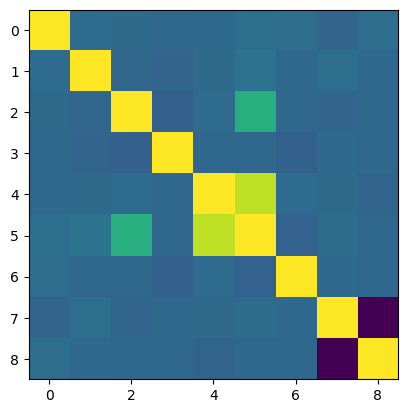

In [209]:
plt.imshow(D4.corr())
plt.show()

In [210]:
D4.head()

,Age,Items,Monthly Income,Transaction Time,Record,Total Spend,Female,Tier 1,Tier 2
0,42,10,7313,627.668127,5,4198.385084,1,1,0
1,24,8,17747,126.904567,3,4134.976648,1,0,1
2,47,11,22845,873.469701,2,5166.614455,0,0,1
3,50,11,18552,380.219428,7,7784.447676,1,1,0
4,60,2,14439,403.374223,2,3254.160485,1,0,1


In [211]:
D4.corr()

,Age,Items,Monthly Income,Transaction Time,Record,Total Spend,Female,Tier 1,Tier 2
Age,1.000000,0.016626,0.010164,-0.007045,0.003397,0.033610,0.026996,-0.015177,0.028467
Items,0.016626,1.000000,-0.013364,-0.020551,0.012683,0.067042,-0.006959,0.035742,0.006314
Monthly Income,0.010164,-0.013364,1.000000,-0.044855,0.018491,0.438623,-0.005637,-0.015803,-0.004128
Transaction Time,-0.007045,-0.020551,-0.044855,1.000000,-0.005044,-0.005610,-0.038704,0.006533,-0.005512
Record,0.003397,0.012683,0.018491,-0.005044,1.000000,0.857675,0.015554,0.012696,-0.021404
Total Spend,0.033610,0.067042,0.438623,-0.005610,0.857675,1.000000,-0.036481,0.023415,-0.006640
Female,0.026996,-0.006959,-0.005637,-0.038704,0.015554,-0.036481,1.000000,0.003662,-0.001277
Tier 1,-0.015177,0.035742,-0.015803,0.006533,0.012696,0.023415,0.003662,1.000000,-0.510633
Tier 2,0.028467,0.006314,-0.004128,-0.005512,-0.021404,-0.006640,-0.001277,-0.510633,1.000000


In [212]:
X=D4[['Monthly Income','Record']]
reg12=LinearRegression().fit(X,Y)
reg12.score(X,Y)

0.9143961570004697

In [216]:
Mes=pd.DataFrame([float(x) for x in D4['Monthly Income']])
D5=pd.concat([D4,Mes],axis=1)
D5=D5.drop('Monthly Income',axis=1)
D5.head()

,Age,Items,Transaction Time,Record,Total Spend,Female,Tier 1,Tier 2,0
0,42,10,627.668127,5,4198.385084,1,1,0,7313.0
1,24,8,126.904567,3,4134.976648,1,0,1,17747.0
2,47,11,873.469701,2,5166.614455,0,0,1,22845.0
3,50,11,380.219428,7,7784.447676,1,1,0,18552.0
4,60,2,403.374223,2,3254.160485,1,0,1,14439.0


In [220]:
columnas=[' Items ' , 'Transaction Time', 'Record', 'Female', 'Tier 1', 'Tier 2',0]
X=D5[columnas]

In [221]:
seleccionador=seleccionador.fit(X,Y)
seleccionador.ranking_

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([3, 7, 1, 2, 4, 5, 6])

In [223]:
columnas=[' Items ', 'Record', 'Female', 'Tier 1', 'Tier 2',0]
X=D5[columnas]
reg13=LinearRegression().fit(X,Y)
reg13.score(X,Y)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.9213649326007262

### Error Cuadrático Medio

$$ECM=\sqrt{\frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{n-c-1}}$$

In [227]:
err13=reg13.predict(X)-Y
ECM13=np.sqrt(np.sum(err13**2)/(len(D4)-2-1))

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [228]:
ECM13

785.4432830686981

### Porcentaje de error

$$ECM/\overline{y}$$

In [230]:
ECM13/np.mean(Y)

0.12744131111233561

In [232]:
err14=reg13.predict(X)-Y
ECM14=np.sqrt(np.sum(err14**2)/(len(D4)-6-1))

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [233]:
ECM14,ECM14/np.mean(Y)

(786.1100431913732, 0.12754949560644593)